In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import random as rd
import os
from tqdm import tqdm
import tensorflow_addons as tfa
import pandas as pd
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar
import csv

plt.style.use(['science','ieee'])

os.chdir('/home/mathis/Stage M1/')

2022-06-23 14:38:08.363776: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-23 14:38:08.363801: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#GeV [min,max]

M1_range = M2_range = M3_range = [50, 5000]
mA_range = [50, 5000]
tanB_range = [2, 60]
mu_range = [-10**4, 10**4]
At_range = Ab_range = Atau_range = [-10**4, 10**4]
Mq1L_range = Mq3L_range = [50, 5000]
MuR_range = MdR_range = MtR_range = MbR_range = [50, 5000]
MeL_range = MtauL_range = MeR_range = MtauR_range = [50, 5000]

PMSSM_range= [M1_range, M2_range, M3_range, mA_range, tanB_range, mu_range, At_range, Ab_range, 
              Atau_range, Mq1L_range, Mq3L_range, MuR_range, MdR_range, MtR_range, MbR_range,
             MeL_range, MtauL_range, MeR_range, MtauR_range]

In [3]:
path = 'Advanced NN/AL/AL_run/'
folder_r = '2022-06-08-08:57:07_II/'
file = 'K_pool_tot.csv'

with open(path+folder_r+file) as f:
    f.readline()
    data = csv.reader(f, delimiter='\t')
    data = list(data)
    
commande = 'mkdir -p Advanced\ NN/AL/AL_plot/' + folder_r
os.system(commande)

commande = 'mkdir -p Advanced\ NN/AL/AL_plot/' + folder_r + 'good'
os.system(commande)

commande = 'mkdir -p Advanced\ NN/AL/AL_plot/' + folder_r + 'bad'
os.system(commande)

commande = 'mkdir -p Advanced\ NN/AL/AL_plot/' + folder_r + 'good\ vs\ bad'
os.system(commande)

0

In [4]:
good_data = [[] for i in range(19)]
bad_data  = [[] for i in range(19)]

good_data_logits = [[] for i in range(19)]
bad_data_logits  = [[] for i in range(19)]

In [5]:
compteur = 0
for i in data:
    compteur += 1
    if i[-1] == '0':
        for j in range(19):
            bad_data[j].append(float(i[j])*(PMSSM_range[j][1]-PMSSM_range[j][0])+PMSSM_range[j][0])
            bad_data_logits[j].append(float(i[j]))
    
    if i[-1] == '1':
        for j in range(19):
            good_data[j].append(float(i[j])*(PMSSM_range[j][1]-PMSSM_range[j][0])+PMSSM_range[j][0])
            good_data_logits[j].append(float(i[j]))
            
good_data_logits = tf.convert_to_tensor(good_data_logits)
bad_data_logits = tf.convert_to_tensor(bad_data_logits)

good_data_logits = tf.transpose(good_data_logits)
bad_data_logits = tf.transpose(bad_data_logits)

2022-06-23 14:39:07.616860: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-23 14:39:07.616992: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-23 14:39:07.617074: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (MPC): /proc/driver/nvidia/version does not exist
2022-06-23 14:39:07.619472: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-23 14:39:22.674099: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 68372108 exceeds 10% of

In [6]:
print(len(good_data[0]))
print(len(bad_data[0]))

print(len(good_data_logits[0]))
print(len(bad_data_logits[0]))

print(len(good_data[0])+len(bad_data[0]))

100367
899633
19
19
1000000


In [7]:
def plot_histo(title, xlabel, ylabel, list_hist,bins, label, color=None, legend = False, histtype='bar', save=False, file_folder=''):
    plt.figure()
    for indice, hist in enumerate(list_hist):
        plt.hist(hist,bins,label=label[indice],histtype=histtype,color=color[indice],stacked=True,linestyle='solid')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend == True:
        plt.legend()
    if save == True:
        plt.savefig(file_folder)
    
def subplot_histo(titre, xlabel, ylabel, bins, x, y, share, subtitle, hist_list, label, color=None, legend = False, histtype='bar', save=False, file_folder=''):  
    fig , ax = plt.subplots(x, y, sharex=share[0], sharey=share[1], constrained_layout = True)
    plt.suptitle(titre)
    fig.text(0.5, -0.05, xlabel, ha='center')
    fig.text(-0.04, 0.5, ylabel, va='center', rotation='vertical')

    for indice, hist in enumerate(hist_list): 
        compteur = 0
        for i in range(x):
            if y != 1:
                for j in range(y):
                    ax[i, j].hist(hist[compteur],bins,histtype=histtype,label=label[indice], color=color[indice], stacked=True, linestyle='solid')
                    ax[i, j].set_title(subtitle[compteur])
                    compteur+=1
                    if legend == True:
                        ax[i, j].legend()
            else:
                ax[i].hist(hist[compteur],bins,histtype=histtype, label=label[indice], color=color[indice], stacked=True, linestyle='solid')
                ax[i].set_title(subtitle[compteur])
                compteur+=1
                if legend == True:
                    ax[i].legend()
    if save == True:
        plt.savefig(file_folder)

In [8]:
M_param_g = [good_data[0],good_data[1],good_data[2]]
mA_param_g = good_data[3]
tanB_g = good_data[4]
mu_g = good_data[5]
A_param_g = [good_data[6],good_data[7],good_data[8]]
mqL_param_g = [good_data[9],good_data[10]]
quark_param_g = [good_data[11],good_data[12],good_data[13],good_data[14]]
mlL_param_g = [good_data[15],good_data[16]]
mlR_param_g = [good_data[17],good_data[18]]

PMSSM_all = M_param_g + [mA_param_g,tanB_g,mu_g] + A_param_g + mqL_param_g + quark_param_g + mlL_param_g + mlR_param_g

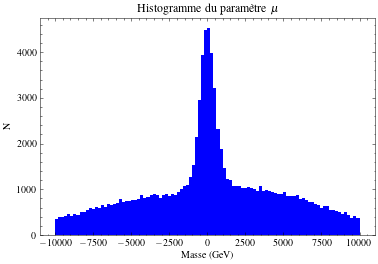

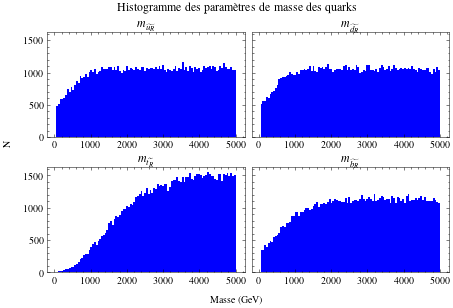

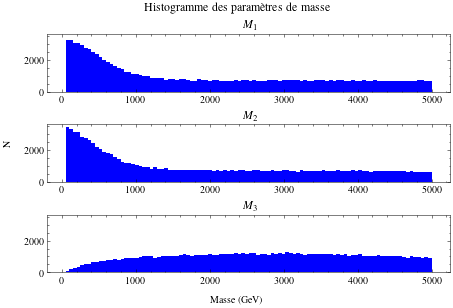

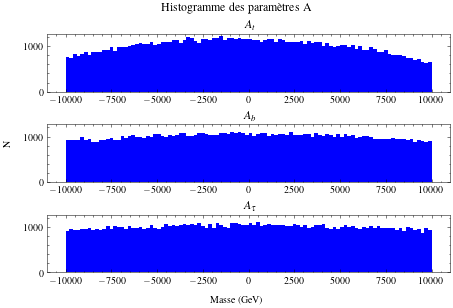

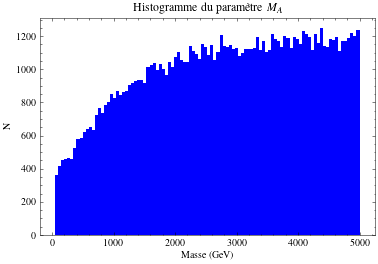

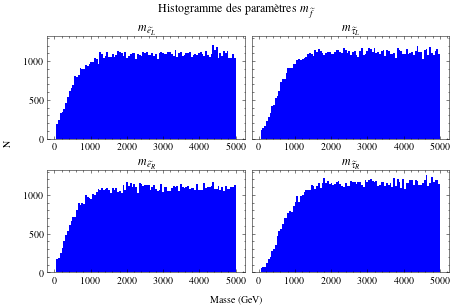

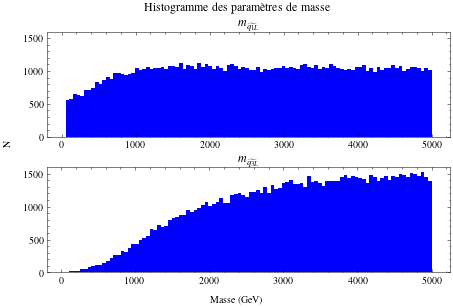

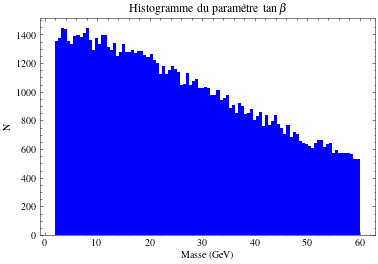

In [9]:
save = True
color = ['blue']
share = [False,True]
bins = 100
legend = ['AL']

folder = 'Advanced NN/AL/AL_plot/' + folder_r + '/good'

xlabel = 'Masse (GeV)'
ylabel = 'N'

file = '/histo_mu.svg'
titre = r'Histogramme du paramètre $\mu$'
plot_histo(titre,xlabel,ylabel,[mu_g],bins,legend,color=color,save=save,file_folder=folder+file)

file = '/histo_mquarks.svg'
titre = 'Histogramme des paramètres de masse des quarks'
subtitle_quark = [r'$m_{\widetilde{u_R}}$',r'$m_{\widetilde{d_R}}$',r'$m_{\widetilde{t_R}}$',r'$m_{\widetilde{b_R}}$']
subplot_histo(titre,xlabel,ylabel,bins,2,2,share,subtitle_quark,[quark_param_g],legend,color=color,save=save,file_folder=folder+file)

file = '/histo_M.svg'
titre = 'Histogramme des paramètres de masse'
subtitle_M = [r'$M_1$',r'$M_2$',r'$M_3$']
subplot_histo(titre,xlabel,ylabel,bins,3,1,share,subtitle_M,[M_param_g],legend,color=color,save=save,file_folder=folder+file)

file = '/histo_A.svg'
titre = 'Histogramme des paramètres A'
subtitle_A = [r'$A_t$',r'$A_b$',r'$A_\tau$']
subplot_histo(titre,xlabel,ylabel,bins,3,1,share,subtitle_A,[A_param_g],legend,color=color,save=save,file_folder=folder+file)

file = '/histo_mA.svg'
titre = r'Histogramme du paramètre $M_A$'
plot_histo(titre,xlabel,ylabel,[mA_param_g],bins,legend,color=color,save=save,file_folder=folder+file)

file = '/histo_ml.svg'
titre = r'Histogramme des paramètres $m_{\widetilde{f}}$'
subtitle_ml = [r'$m_{\widetilde{e_L}}$',r'$m_{\widetilde{\tau_L}}$',r'$m_{\widetilde{e_R}}$',r'$m_{\widetilde{\tau_R}}$']
subplot_histo(titre,xlabel,ylabel,bins,2,2,share,subtitle_ml,[mlL_param_g+mlR_param_g],legend,color=color,save=save,file_folder=folder+file)

file = '/histo_mqL.svg'
titre = 'Histogramme des paramètres de masse'
subtitle_qL = [r'$m_{\widetilde{q_{1L}}}$',r'$m_{\widetilde{q_{3L}}}$']
subplot_histo(titre,xlabel,ylabel,bins,2,1,share,subtitle_qL,[mqL_param_g],legend,color=color,save=save,file_folder=folder+file)

file = '/histo_tanb.svg'
titre = r'Histogramme du paramètre $\tan \beta$'
plot_histo(titre,xlabel,ylabel,[tanB_g],bins,legend,color=color,save=save,file_folder=folder+file)

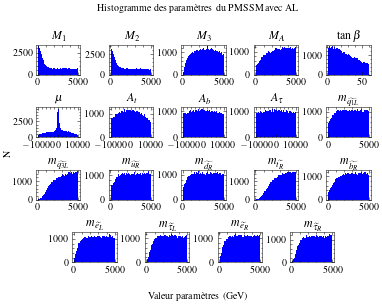

In [10]:
titre_all = 'Histogramme des paramètres du PMSSM avec AL'
subtitle_all = subtitle_M + [r'$M_{A}$',r'$\tan \beta$',r'$\mu$'] + subtitle_A + subtitle_qL
subtitle_all += subtitle_quark + subtitle_ml

bins = 100

fig = plt.figure()

gs = gridspec.GridSpec(4, 10)
gs.update(wspace=3.5,hspace=1.1)

ax0 = plt.subplot(gs[0, 0:2])
ax0.hist(PMSSM_all[0],bins,color=color)
ax0.set_title(subtitle_all[0])

ax1 = plt.subplot(gs[0, 2:4])
ax1.hist(PMSSM_all[1],bins,color=color)
ax1.set_title(subtitle_all[1])

ax2 = plt.subplot(gs[0, 4:6])
ax2.hist(PMSSM_all[2],bins,color=color)
ax2.set_title(subtitle_all[2])

ax3 = plt.subplot(gs[0, 6:8])
ax3.hist(PMSSM_all[3],bins,color=color)
ax3.set_title(subtitle_all[3])

ax4 = plt.subplot(gs[0, 8:10])
ax4.hist(PMSSM_all[4],bins,color=color)
ax4.set_title(subtitle_all[4])

ax5 = plt.subplot(gs[1, 0:2])
ax5.hist(PMSSM_all[5],bins,color=color)
ax5.set_title(subtitle_all[5])

ax6 = plt.subplot(gs[1, 2:4])
ax6.hist(PMSSM_all[6],bins,color=color)
ax6.set_title(subtitle_all[6])

ax7 = plt.subplot(gs[1, 4:6])
ax7.hist(PMSSM_all[7],bins,color=color)
ax7.set_title(subtitle_all[7])

ax8 = plt.subplot(gs[1, 6:8])
ax8.hist(PMSSM_all[8],bins,color=color)
ax8.set_title(subtitle_all[8])

ax9 = plt.subplot(gs[1, 8:10])
ax9.hist(PMSSM_all[9],bins,color=color)
ax9.set_title(subtitle_all[9])

ax10 = plt.subplot(gs[2, 0:2])
ax10.hist(PMSSM_all[10],bins,color=color)
ax10.set_title(subtitle_all[10])

ax11 = plt.subplot(gs[2, 2:4])
ax11.hist(PMSSM_all[11],bins,color=color)
ax11.set_title(subtitle_all[11])

ax12 = plt.subplot(gs[2, 4:6])
ax12.hist(PMSSM_all[12],bins,color=color)
ax12.set_title(subtitle_all[12])

ax13 = plt.subplot(gs[2, 6:8])
ax13.hist(PMSSM_all[13],bins,color=color)
ax13.set_title(subtitle_all[13])

ax14 = plt.subplot(gs[2, 8:10])
ax14.hist(PMSSM_all[14],bins,color=color)
ax14.set_title(subtitle_all[14])

ax15 = plt.subplot(gs[3, 1:3])
ax15.hist(PMSSM_all[15],bins,color=color)
ax15.set_title(subtitle_all[15])

ax16 = plt.subplot(gs[3, 3:5])
ax16.hist(PMSSM_all[16],bins,color=color)
ax16.set_title(subtitle_all[16])

ax17 = plt.subplot(gs[3, 5:7])
ax17.hist(PMSSM_all[17],bins,color=color)
ax17.set_title(subtitle_all[17])

ax18 = plt.subplot(gs[3, 7:9])
ax18.hist(PMSSM_all[18],bins,color=color)
ax18.set_title(subtitle_all[18])

fig.text(0.5, 1, titre_all, ha='center')
fig.text(0.5, 0, 'Valeur paramètres (GeV)', ha='center')
fig.text(0.05, 0.5, 'N', va='center', rotation='vertical')

plt.savefig(folder+'/pmssm_plot.svg')
plt.show()

In [11]:
M_param_b = [bad_data[0],bad_data[1],bad_data[2]]
mA_param_b = bad_data[3]
tanB_b = bad_data[4]
mu_b = bad_data[5]
A_param_b = [bad_data[6],bad_data[7],bad_data[8]]
mqL_param_b = [bad_data[9],bad_data[10]]
quark_param_b = [bad_data[11],bad_data[12],bad_data[13],bad_data[14]]
mlL_param_b = [bad_data[15],bad_data[16]]
mlR_param_b = [bad_data[17],bad_data[18]]

PMSSM_all_b = M_param_b + [mA_param_b,tanB_b,mu_b] + A_param_b + mqL_param_b + quark_param_b + mlL_param_b + mlR_param_b

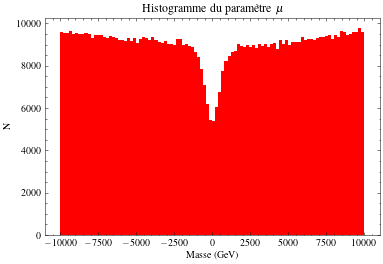

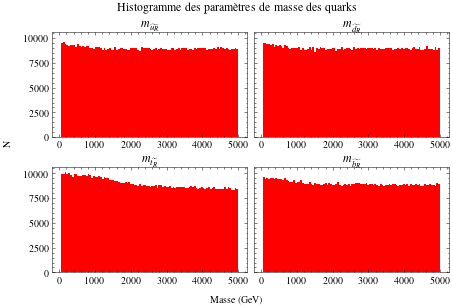

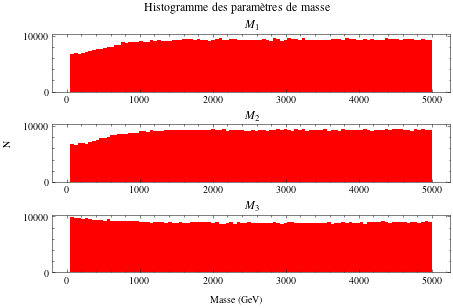

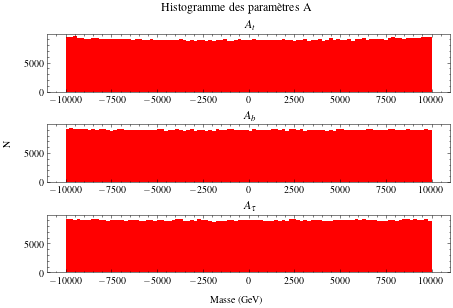

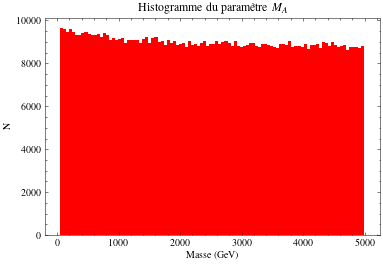

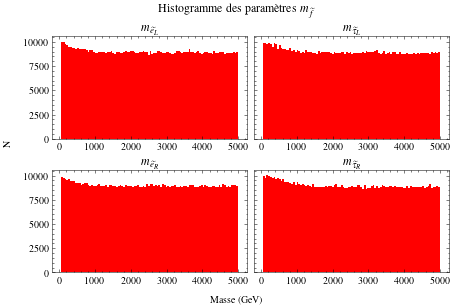

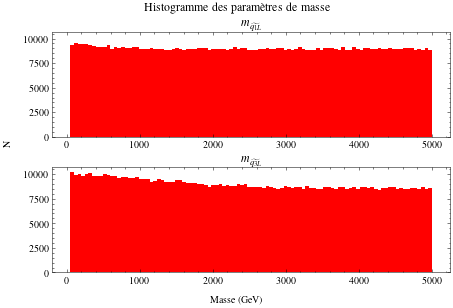

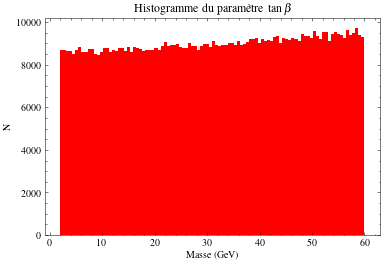

In [12]:
save = True
color = ['red']
share = [False,True]
legend = ['AL']

folder = 'Advanced NN/AL/AL_plot/' + folder_r + '/bad'

xlabel = 'Masse (GeV)'
ylabel = 'N'

file = '/histo_mu.svg'
titre = r'Histogramme du paramètre $\mu$'
plot_histo(titre,xlabel,ylabel,[mu_b],bins,legend,color=color,save=save,file_folder=folder+file)

file = '/histo_mquarks.svg'
titre = 'Histogramme des paramètres de masse des quarks'
subtitle_quark = [r'$m_{\widetilde{u_R}}$',r'$m_{\widetilde{d_R}}$',r'$m_{\widetilde{t_R}}$',r'$m_{\widetilde{b_R}}$']
subplot_histo(titre,xlabel,ylabel,bins,2,2,share,subtitle_quark,[quark_param_b],legend,color=color,save=save,file_folder=folder+file)

file = '/histo_M.svg'
titre = 'Histogramme des paramètres de masse'
subtitle_M = [r'$M_1$',r'$M_2$',r'$M_3$']
subplot_histo(titre,xlabel,ylabel,bins,3,1,share,subtitle_M,[M_param_b],legend,color=color,save=save,file_folder=folder+file)

file = '/histo_A.svg'
titre = 'Histogramme des paramètres A'
subtitle_A = [r'$A_t$',r'$A_b$',r'$A_\tau$']
subplot_histo(titre,xlabel,ylabel,bins,3,1,share,subtitle_A,[A_param_b],legend,color=color,save=save,file_folder=folder+file)

file = '/histo_mA.svg'
titre = r'Histogramme du paramètre $M_A$'
plot_histo(titre,xlabel,ylabel,[mA_param_b],bins,legend,color=color,save=save,file_folder=folder+file)

file = '/histo_ml.svg'
titre = r'Histogramme des paramètres $m_{\widetilde{f}}$'
subtitle_ml = [r'$m_{\widetilde{e_L}}$',r'$m_{\widetilde{\tau_L}}$',r'$m_{\widetilde{e_R}}$',r'$m_{\widetilde{\tau_R}}$']
subplot_histo(titre,xlabel,ylabel,bins,2,2,share,subtitle_ml,[mlL_param_b+mlR_param_b],legend,color=color,save=save,file_folder=folder+file)

file = '/histo_mqL.svg'
titre = 'Histogramme des paramètres de masse'
subtitle_qL = [r'$m_{\widetilde{q_{1L}}}$',r'$m_{\widetilde{q_{3L}}}$']
subplot_histo(titre,xlabel,ylabel,bins,2,1,share,subtitle_qL,[mqL_param_b],legend,color=color,save=save,file_folder=folder+file)

file = '/histo_tanb.svg'
titre = r'Histogramme du paramètre $\tan \beta$'
plot_histo(titre,xlabel,ylabel,[tanB_b],bins,legend,color=color,save=save,file_folder=folder+file)

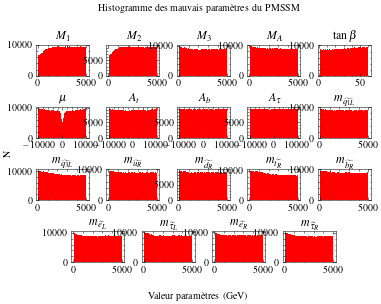

In [13]:
titre_all = 'Histogramme des mauvais paramètres du PMSSM'
subtitle_all = subtitle_M + [r'$M_{A}$',r'$\tan \beta$',r'$\mu$'] + subtitle_A + subtitle_qL
subtitle_all += subtitle_quark + subtitle_ml

fig = plt.figure()

gs = gridspec.GridSpec(4, 10)
gs.update(wspace=1,hspace=1)

ax0 = plt.subplot(gs[0, 0:2])
ax0.hist(PMSSM_all_b[0],bins,color=color)
ax0.set_title(subtitle_all[0])

ax1 = plt.subplot(gs[0, 2:4])
ax1.hist(PMSSM_all_b[1],bins,color=color)
ax1.set_title(subtitle_all[1])

ax2 = plt.subplot(gs[0, 4:6])
ax2.hist(PMSSM_all_b[2],bins,color=color)
ax2.set_title(subtitle_all[2])

ax3 = plt.subplot(gs[0, 6:8])
ax3.hist(PMSSM_all_b[3],bins,color=color)
ax3.set_title(subtitle_all[3])

ax4 = plt.subplot(gs[0, 8:10])
ax4.hist(PMSSM_all_b[4],bins,color=color)
ax4.set_title(subtitle_all[4])

ax5 = plt.subplot(gs[1, 0:2])
ax5.hist(PMSSM_all_b[5],bins,color=color)
ax5.set_title(subtitle_all[5])

ax6 = plt.subplot(gs[1, 2:4])
ax6.hist(PMSSM_all_b[6],bins,color=color)
ax6.set_title(subtitle_all[6])

ax7 = plt.subplot(gs[1, 4:6])
ax7.hist(PMSSM_all_b[7],bins,color=color)
ax7.set_title(subtitle_all[7])

ax8 = plt.subplot(gs[1, 6:8])
ax8.hist(PMSSM_all_b[8],bins,color=color)
ax8.set_title(subtitle_all[8])

ax9 = plt.subplot(gs[1, 8:10])
ax9.hist(PMSSM_all_b[9],bins,color=color)
ax9.set_title(subtitle_all[9])

ax10 = plt.subplot(gs[2, 0:2])
ax10.hist(PMSSM_all_b[10],bins,color=color)
ax10.set_title(subtitle_all[10])

ax11 = plt.subplot(gs[2, 2:4])
ax11.hist(PMSSM_all_b[11],bins,color=color)
ax11.set_title(subtitle_all[11])

ax12 = plt.subplot(gs[2, 4:6])
ax12.hist(PMSSM_all_b[12],bins,color=color)
ax12.set_title(subtitle_all[12])

ax13 = plt.subplot(gs[2, 6:8])
ax13.hist(PMSSM_all_b[13],bins,color=color)
ax13.set_title(subtitle_all[13])

ax14 = plt.subplot(gs[2, 8:10])
ax14.hist(PMSSM_all_b[14],bins,color=color)
ax14.set_title(subtitle_all[14])

ax15 = plt.subplot(gs[3, 1:3])
ax15.hist(PMSSM_all_b[15],bins,color=color)
ax15.set_title(subtitle_all[15])

ax16 = plt.subplot(gs[3, 3:5])
ax16.hist(PMSSM_all_b[16],bins,color=color)
ax16.set_title(subtitle_all[16])

ax17 = plt.subplot(gs[3, 5:7])
ax17.hist(PMSSM_all_b[17],bins,color=color)
ax17.set_title(subtitle_all[17])

ax18 = plt.subplot(gs[3, 7:9])
ax18.hist(PMSSM_all_b[18],bins,color=color)
ax18.set_title(subtitle_all[18])

fig.text(0.5, 1, titre_all, ha='center')
fig.text(0.5, 0, 'Valeur paramètres (GeV)', ha='center')
fig.text(0.05, 0.5, 'N', va='center', rotation='vertical')

plt.savefig(folder+'/pmssm_plot.svg')
plt.show()

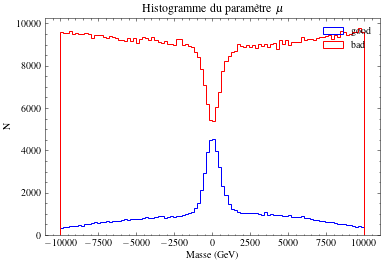

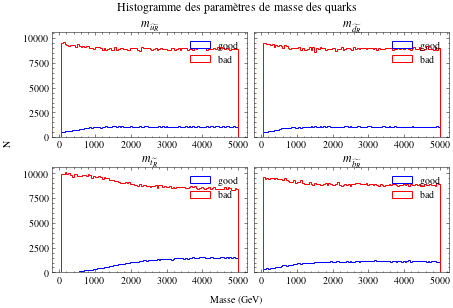

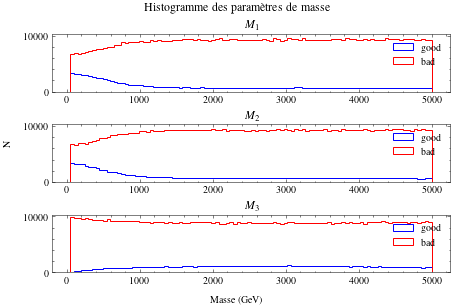

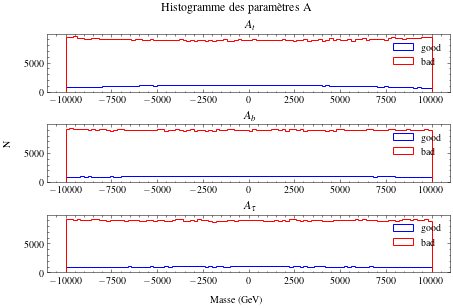

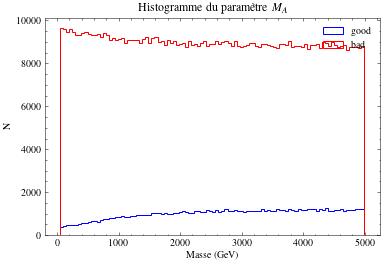

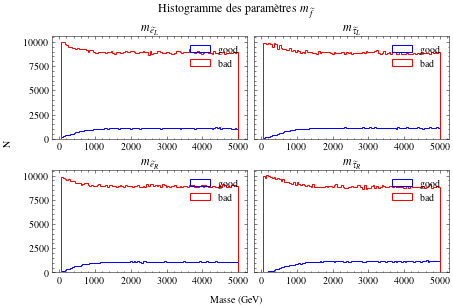

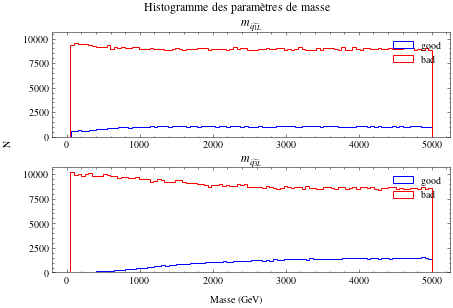

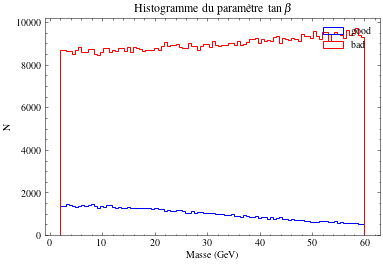

In [14]:
save = True
color = ['blue','red']
share = [False,True]
legend = ['good','bad']
lgd = True

folder = 'Advanced NN/AL/AL_plot/' + folder_r + '/good vs bad'

xlabel = 'Masse (GeV)'
ylabel = 'N'

file = '/histo_mu.svg'
titre = r'Histogramme du paramètre $\mu$'
plot_histo(titre,xlabel,ylabel,[mu_g,mu_b],bins,legend,color=color,save=save,file_folder=folder+file,legend=lgd,histtype='step')

file = '/histo_mquarks.svg'
titre = 'Histogramme des paramètres de masse des quarks'
subtitle_quark = [r'$m_{\widetilde{u_R}}$',r'$m_{\widetilde{d_R}}$',r'$m_{\widetilde{t_R}}$',r'$m_{\widetilde{b_R}}$']
subplot_histo(titre,xlabel,ylabel,bins,2,2,share,subtitle_quark,[quark_param_g,quark_param_b],legend,color=color,save=save,file_folder=folder+file,legend=lgd,histtype='step')

file = '/histo_M.svg'
titre = 'Histogramme des paramètres de masse'
subtitle_M = [r'$M_1$',r'$M_2$',r'$M_3$']
subplot_histo(titre,xlabel,ylabel,bins,3,1,share,subtitle_M,[M_param_g,M_param_b],legend,color=color,save=save,file_folder=folder+file,legend=lgd,histtype='step')

file = '/histo_A.svg'
titre = 'Histogramme des paramètres A'
subtitle_A = [r'$A_t$',r'$A_b$',r'$A_\tau$']
subplot_histo(titre,xlabel,ylabel,bins,3,1,share,subtitle_A,[A_param_g,A_param_b],legend,color=color,save=save,file_folder=folder+file,legend=lgd,histtype='step')

file = '/histo_mA.svg'
titre = r'Histogramme du paramètre $M_A$'
plot_histo(titre,xlabel,ylabel,[mA_param_g,mA_param_b],bins,legend,color=color,save=save,file_folder=folder+file,legend=lgd,histtype='step')

file = '/histo_ml.svg'
titre = r'Histogramme des paramètres $m_{\widetilde{f}}$'
subtitle_ml = [r'$m_{\widetilde{e_L}}$',r'$m_{\widetilde{\tau_L}}$',r'$m_{\widetilde{e_R}}$',r'$m_{\widetilde{\tau_R}}$']
subplot_histo(titre,xlabel,ylabel,bins,2,2,share,subtitle_ml,[mlL_param_g+mlR_param_g,mlL_param_b+mlR_param_b],legend,color=color,save=save,file_folder=folder+file,legend=lgd,histtype='step')

file = '/histo_mqL.svg'
titre = 'Histogramme des paramètres de masse'
subtitle_qL = [r'$m_{\widetilde{q_{1L}}}$',r'$m_{\widetilde{q_{3L}}}$']
subplot_histo(titre,xlabel,ylabel,bins,2,1,share,subtitle_qL,[mqL_param_g,mqL_param_b],legend,color=color,save=save,file_folder=folder+file,legend=lgd,histtype='step')

file = '/histo_tanb.svg'
titre = r'Histogramme du paramètre $\tan \beta$'
plot_histo(titre,xlabel,ylabel,[tanB_g,tanB_b],bins,legend,color=color,save=save,file_folder=folder+file,legend=lgd,histtype='step')

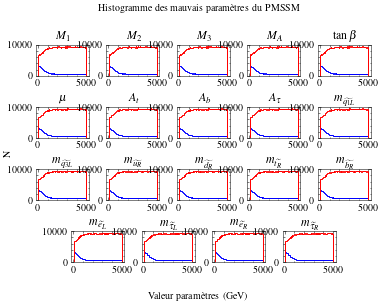

In [15]:
titre_all = 'Histogramme des mauvais paramètres du PMSSM'
subtitle_all = subtitle_M + [r'$M_{A}$',r'$\tan \beta$',r'$\mu$'] + subtitle_A + subtitle_qL
subtitle_all += subtitle_quark + subtitle_ml

fig = plt.figure()

gs = gridspec.GridSpec(4, 10)
gs.update(wspace=1,hspace=1)

ax0 = plt.subplot(gs[0, 0:2])
ax0.hist(PMSSM_all[0],bins,color='blue',histtype='step',linestyle='solid')
ax0.hist(PMSSM_all_b[0],bins,color='red',histtype='step',linestyle='solid')
ax0.set_title(subtitle_all[0])

ax1 = plt.subplot(gs[0, 2:4])
ax1.hist(PMSSM_all[0],bins,color='blue',histtype='step',linestyle='solid')
ax1.hist(PMSSM_all_b[0],bins,color='red',histtype='step',linestyle='solid')
ax1.set_title(subtitle_all[1])

ax2 = plt.subplot(gs[0, 4:6])
ax2.hist(PMSSM_all[0],bins,color='blue',histtype='step',linestyle='solid')
ax2.hist(PMSSM_all_b[0],bins,color='red',histtype='step',linestyle='solid')
ax2.set_title(subtitle_all[2])

ax3 = plt.subplot(gs[0, 6:8])
ax3.hist(PMSSM_all[0],bins,color='blue',histtype='step',linestyle='solid')
ax3.hist(PMSSM_all_b[0],bins,color='red',histtype='step',linestyle='solid')
ax3.set_title(subtitle_all[3])

ax4 = plt.subplot(gs[0, 8:10])
ax4.hist(PMSSM_all[0],bins,color='blue',histtype='step',linestyle='solid')
ax4.hist(PMSSM_all_b[0],bins,color='red',histtype='step',linestyle='solid')
ax4.set_title(subtitle_all[4])

ax5 = plt.subplot(gs[1, 0:2])
ax5.hist(PMSSM_all[0],bins,color='blue',histtype='step',linestyle='solid')
ax5.hist(PMSSM_all_b[0],bins,color='red',histtype='step',linestyle='solid')
ax5.set_title(subtitle_all[5])

ax6 = plt.subplot(gs[1, 2:4])
ax6.hist(PMSSM_all[0],bins,color='blue',histtype='step',linestyle='solid')
ax6.hist(PMSSM_all_b[0],bins,color='red',histtype='step',linestyle='solid')
ax6.set_title(subtitle_all[6])

ax7 = plt.subplot(gs[1, 4:6])
ax7.hist(PMSSM_all[0],bins,color='blue',histtype='step',linestyle='solid')
ax7.hist(PMSSM_all_b[0],bins,color='red',histtype='step',linestyle='solid')
ax7.set_title(subtitle_all[7])

ax8 = plt.subplot(gs[1, 6:8])
ax8.hist(PMSSM_all[0],bins,color='blue',histtype='step',linestyle='solid')
ax8.hist(PMSSM_all_b[0],bins,color='red',histtype='step',linestyle='solid')
ax8.set_title(subtitle_all[8])

ax9 = plt.subplot(gs[1, 8:10])
ax9.hist(PMSSM_all[0],bins,color='blue',histtype='step',linestyle='solid')
ax9.hist(PMSSM_all_b[0],bins,color='red',histtype='step',linestyle='solid')
ax9.set_title(subtitle_all[9])

ax10 = plt.subplot(gs[2, 0:2])
ax10.hist(PMSSM_all[0],bins,color='blue',histtype='step',linestyle='solid')
ax10.hist(PMSSM_all_b[0],bins,color='red',histtype='step',linestyle='solid')
ax10.set_title(subtitle_all[10])

ax11 = plt.subplot(gs[2, 2:4])
ax11.hist(PMSSM_all[0],bins,color='blue',histtype='step',linestyle='solid')
ax11.hist(PMSSM_all_b[0],bins,color='red',histtype='step',linestyle='solid')
ax11.set_title(subtitle_all[11])

ax12 = plt.subplot(gs[2, 4:6])
ax12.hist(PMSSM_all[0],bins,color='blue',histtype='step',linestyle='solid')
ax12.hist(PMSSM_all_b[0],bins,color='red',histtype='step',linestyle='solid')
ax12.set_title(subtitle_all[12])

ax13 = plt.subplot(gs[2, 6:8])
ax13.hist(PMSSM_all[0],bins,color='blue',histtype='step',linestyle='solid')
ax13.hist(PMSSM_all_b[0],bins,color='red',histtype='step',linestyle='solid')
ax13.set_title(subtitle_all[13])

ax14 = plt.subplot(gs[2, 8:10])
ax14.hist(PMSSM_all[0],bins,color='blue',histtype='step',linestyle='solid')
ax14.hist(PMSSM_all_b[0],bins,color='red',histtype='step',linestyle='solid')
ax14.set_title(subtitle_all[14])

ax15 = plt.subplot(gs[3, 1:3])
ax15.hist(PMSSM_all[0],bins,color='blue',histtype='step',linestyle='solid')
ax15.hist(PMSSM_all_b[0],bins,color='red',histtype='step',linestyle='solid')
ax15.set_title(subtitle_all[15])

ax16 = plt.subplot(gs[3, 3:5])
ax16.hist(PMSSM_all[0],bins,color='blue',histtype='step',linestyle='solid')
ax16.hist(PMSSM_all_b[0],bins,color='red',histtype='step',linestyle='solid')
ax16.set_title(subtitle_all[16])

ax17 = plt.subplot(gs[3, 5:7])
ax17.hist(PMSSM_all[0],bins,color='blue',histtype='step',linestyle='solid')
ax17.hist(PMSSM_all_b[0],bins,color='red',histtype='step',linestyle='solid')
ax17.set_title(subtitle_all[17])

ax18 = plt.subplot(gs[3, 7:9])
ax18.hist(PMSSM_all[0],bins,color='blue',histtype='step',linestyle='solid')
ax18.hist(PMSSM_all_b[0],bins,color='red',histtype='step',linestyle='solid')
ax18.set_title(subtitle_all[18])

fig.text(0.5, 1, titre_all, ha='center')
fig.text(0.5, 0, 'Valeur paramètres (GeV)', ha='center')
fig.text(0.05, 0.5, 'N', va='center', rotation='vertical')

plt.savefig(folder+'/pmssm_plot.svg')
plt.show()

In [16]:
#folder_model = '2022-06-08-08:57:07/'
folder_model = folder_r
model = tf.keras.models.load_model(path+folder_model+'model_II.h5')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense (Dense)               (None, 100)               2000      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 12,201
Trainable params: 12,201
Non-trainable params: 0
_________________________________________________________________


In [17]:
print(good_data_logits)
print(bad_data_logits)

tf.Tensor(
[[0.98524815 0.08276349 0.127872   ... 0.9142888  0.37928566 0.9007839 ]
 [0.9417823  0.35946545 0.6536327  ... 0.62164295 0.78554696 0.5783778 ]
 [0.9556742  0.47073215 0.80665797 ... 0.46152273 0.5635986  0.04971   ]
 ...
 [0.75265914 0.7453612  0.58289665 ... 0.93637735 0.67693305 0.82866573]
 [0.00322329 0.08725685 0.47743052 ... 0.40688476 0.87592703 0.72504693]
 [0.01201129 0.22552516 0.09853052 ... 0.7133167  0.6958721  0.46486217]], shape=(100367, 19), dtype=float32)
tf.Tensor(
[[0.8053444  0.39289075 0.42497957 ... 0.0460147  0.809182   0.00243838]
 [0.8990013  0.01079857 0.71047574 ... 0.37939036 0.5559067  0.11255144]
 [0.91325265 0.9560941  0.85252815 ... 0.10692615 0.6770938  0.27000946]
 ...
 [0.20573169 0.11685598 0.41720688 ... 0.45567292 0.49084738 0.5535557 ]
 [0.81860006 0.66475093 0.8986481  ... 0.13150167 0.87452984 0.72336507]
 [0.8251957  0.4675381  0.77847385 ... 0.28484815 0.4327376  0.6034548 ]], shape=(899633, 19), dtype=float32)


In [18]:
good_logits_pred = model(good_data_logits)
bad_logits_pred = model(bad_data_logits)

2022-06-23 14:47:16.331781: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 40146800 exceeds 10% of free system memory.
2022-06-23 14:47:16.393910: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 40146800 exceeds 10% of free system memory.
2022-06-23 14:47:16.418436: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 40146800 exceeds 10% of free system memory.


In [19]:
good_compteur_1 = 0
good_compteur_0 = 0
good_compteur_05 = 0

for i in good_logits_pred:
    if i.numpy() < 0.5:
        good_compteur_0 += 1
    if i.numpy() > 0.5:
        good_compteur_1 += 1
    if i.numpy() == 0.5:
        good_compteur_05 += 1

In [20]:
bad_compteur_1 = 0
bad_compteur_0 = 0
bad_compteur_05 = 0

for i in bad_logits_pred:
    if i.numpy() < 0.5:
        bad_compteur_0 += 1
    if i.numpy() > 0.5:
        bad_compteur_1 += 1
    if i.numpy() == 0.5:
        bad_compteur_05 += 1

In [21]:
assert good_compteur_1 + good_compteur_0 + good_compteur_05 == len(good_data[0])
assert bad_compteur_1 + bad_compteur_0 + bad_compteur_05 == len(bad_data[0])

In [22]:
print(bad_compteur_1,bad_compteur_0,bad_compteur_05)
print(good_compteur_1,good_compteur_0,good_compteur_05)

print(good_compteur_1+good_compteur_0+good_compteur_05)
print(good_compteur_1+good_compteur_0)

print(bad_compteur_1+bad_compteur_0+bad_compteur_05)
print(bad_compteur_1+bad_compteur_0)

13516 886117 0
36886 63481 0
100367
100367
899633
899633


In [23]:
TP = good_compteur_1
FN = good_compteur_0

FP = bad_compteur_1
TN = bad_compteur_0

In [24]:
print('True positive: ',TP)
print('False positive: ',FP)
print('True negative: ',TN)
print('False negative: ',FN)

print('Positive prediction: ',round(TP/(TP+FP)*100,1))
print('Negative prediction: ',round(TN/(TN+FN)*100,1))

print('Sensitivity: ',round(TP/(TP+FN)*100,1))
print('Specificity: ',round(TN/(FP+TN)*100,1))

True positive:  36886
False positive:  13516
True negative:  886117
False negative:  63481
Positive prediction:  73.2
Negative prediction:  93.3
Sensitivity:  36.8
Specificity:  98.5


In [25]:
with open('Advanced NN/AL/AL_plot/' + folder_r+'/Sensi_speci.txt', 'w') as f:
    f.write('Data de la run: '+folder_r+'\n')
    f.write('Réseau de la run: '+folder_model+'\n \n')
    f.write('True: '+str(len(good_data[0]))+'\n')
    f.write('False: '+str(len(bad_data[0]))+'\n \n')
    f.write('True positive: '+str(TP)+'\n')
    f.write('False positive: '+str(FP)+'\n')
    f.write('True negative: '+str(TN)+'\n')
    f.write('False negative: '+str(FN)+'\n \n')
    f.write('Positive prediction: '+str(round(TP/(TP+FP)*100,1))+'\n')
    f.write('Negative prediction: '+str(round(TN/(TN+FN)*100,1))+'\n \n')
    f.write('Sensitivity: '+str(round(TP/(TP+FN)*100,1))+'\n')
    f.write('Specificity: '+str(round(TN/(FP+TN)*100,1))+'\n')